<a href="https://colab.research.google.com/github/marcelounb/Deep_Learning_with_python_JasonBrownlee/blob/master/17_4_Drop_Based_Learning_Rate_Schedule_Ionosphere_Classi%EF%AC%81cation_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ionosphere Classiﬁcation Dataset
The Ionosphere binary classiﬁcation problem is used as a demonstration in this lesson. The dataset describes radar returns where the target was free electrons in the ionosphere. It is a binary classiﬁcation problem where positive cases (g for good) show evidence of some type of structure in the ionosphere and negative cases (b for bad) do not. 

It is a good dataset for practicing with neural networks because all of the inputs are small numerical values of the same scale. There are 34 attributes and 351 observations. State-of-the-art results on this dataset achieve an accuracy of approximately 94% to 98% accuracy using 10-fold cross validation.

 The dataset is available within the code bundle provided with this book. Alternatively, you can download it directly from the UCI Machine Learning repository. Place the data ﬁle in your working directory with the ﬁlename ionosphere.csv. You can learn more about the ionosphere dataset on the UCI Machine Learning Repository website.


# 17.4 Drop-Based Learning Rate Schedule
Another popular learning rate schedule used with deep learning models is to systematically drop the learning rate at speciﬁc times during training. Often this method is implemented by dropping the learning rate by half every ﬁxed number of epochs. For example, we may have an initial learning rate of 0.1 and drop it by a factor of 0.5 every 10 epochs. 

The ﬁrst 10 epochs of training would use a value of 0.1, in the next 10 epochs a learning rate of 0.05 would be used, and so on.


We can implement this in Keras using the LearningRateScheduler callback4 when ﬁtting the model. The LearningRateScheduler callback allows us to deﬁne a function to call that takes the epoch number as an argument and returns the learning rate to use in stochastic gradient descent. 

When used, the learning rate speciﬁed by stochastic gradient descent is ignored. In the code below, we use the same example before of a single hidden layer network on the Ionosphere dataset. A new step_decay() function is deﬁned that implements the equation:

    LearningRate = InitialLearningRate X DropRate**floor( 1+Epoch / EpochDrop)


Where InitialLearningRate is the learning rate at the beginning of the run, EpochDrop is how often the learning rate is dropped in epochs and DropRate is how much to drop the learning rate each time it is dropped.


In [1]:
# Time Based Learning Rate Decay
import pandas as pd 
import numpy as np
import math
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD 
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt 

Using TensorFlow backend.


In [2]:
# learning rate schedule 
def step_decay(epoch): 
  initial_lrate = 0.1 
  drop = 0.5 
  epochs_drop = 10.0 
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop)) 
  return lrate

In [3]:
# load dataset 
dataframe = pd.read_csv("ionosphere.csv") 
dataset = dataframe.values 
# split into input (X) and output (Y) variables 
X = dataset[:,0:34].astype(float) 
Y = dataset[:,34] 

In [4]:
X[0], Y[0]

(array([ 1.     ,  0.     ,  0.99539, -0.05889,  0.85243,  0.02306,
         0.83398, -0.37708,  1.     ,  0.0376 ,  0.85243, -0.17755,
         0.59755, -0.44945,  0.60536, -0.38223,  0.84356, -0.38542,
         0.58212, -0.32192,  0.56971, -0.29674,  0.36946, -0.47357,
         0.56811, -0.51171,  0.41078, -0.46168,  0.21266, -0.3409 ,
         0.42267, -0.54487,  0.18641, -0.453  ]), 'g')

In [5]:
X.shape, Y.shape

((351, 34), (351,))

In [6]:
# fix random seed for reproducibility 
seed = 7 
np.random.seed(seed)

In [7]:
# encode class values as integers 
encoder = LabelEncoder() 
encoder.fit(Y) 
Y = encoder.transform(Y) 

In [8]:
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
# create model 
model = Sequential() 
model.add(Dense(34, input_dim=34, kernel_initializer= 'normal' , activation= 'relu' )) 
model.add(Dense(1, kernel_initializer= 'normal' , activation= 'sigmoid' ))

In [11]:
# Compile model 
sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False) 
model.compile(loss= 'binary_crossentropy' , optimizer=sgd, metrics=[ 'accuracy' ])

In [13]:
# learning schedule callback 
lrate = LearningRateScheduler(step_decay) 
callbacks_list = [lrate]

In [14]:
# Fit the model 
history = model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=28, callbacks=callbacks_list, verbose=2) 

Train on 235 samples, validate on 116 samples
Epoch 1/50
 - 0s - loss: 0.6803 - accuracy: 0.6468 - val_loss: 0.6199 - val_accuracy: 0.9138
Epoch 2/50
 - 0s - loss: 0.6195 - accuracy: 0.7234 - val_loss: 0.4761 - val_accuracy: 0.8621
Epoch 3/50
 - 0s - loss: 0.4985 - accuracy: 0.8255 - val_loss: 0.3681 - val_accuracy: 0.9483
Epoch 4/50
 - 0s - loss: 0.3626 - accuracy: 0.8596 - val_loss: 0.3815 - val_accuracy: 0.8793
Epoch 5/50
 - 0s - loss: 0.2797 - accuracy: 0.8766 - val_loss: 0.1544 - val_accuracy: 0.9655
Epoch 6/50
 - 0s - loss: 0.2156 - accuracy: 0.9191 - val_loss: 0.2178 - val_accuracy: 0.9224
Epoch 7/50
 - 0s - loss: 0.1798 - accuracy: 0.9362 - val_loss: 0.1461 - val_accuracy: 0.9655
Epoch 8/50
 - 0s - loss: 0.1593 - accuracy: 0.9319 - val_loss: 0.0837 - val_accuracy: 0.9741
Epoch 9/50
 - 0s - loss: 0.1742 - accuracy: 0.9362 - val_loss: 0.1508 - val_accuracy: 0.9741
Epoch 10/50
 - 0s - loss: 0.1263 - accuracy: 0.9532 - val_loss: 0.0972 - val_accuracy: 0.9914
Epoch 11/50
 - 0s - los

Running the example results in a classiﬁcation accuracy of 99.14% on the validation dataset, again an improvement over the baseline for the model on this dataset..


In [15]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy', 'lr'])

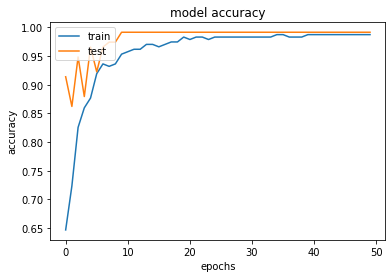

In [16]:
plt.plot(history.history[ 'accuracy' ]) 
plt.plot(history.history[ 'val_accuracy' ]) 
plt.title( 'model accuracy'  ) 
plt.ylabel( 'accuracy'  ) 
plt.xlabel( 'epochs' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()